In [1]:
import os, sys
from pathlib import Path

BASE_DIR = Path(Path.home(), "workspace", "services", "credit_model")
DATA_DIR = Path(Path.home(), "workspace", "data")
if BASE_DIR not in sys.path:
    sys.path.insert(0, f"{BASE_DIR}")

In [2]:
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import toad

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from util import scorebin_helper

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [6]:
fp_data = Path(DATA_DIR, 'tutorial', 'data_for_dashboard.csv')
df_data = pd.read_csv(fp_data, index_col=None)

In [7]:
df_data.head()

,AppNo,Defaulter,sample_type,prob,score,month,Collateral_valuation,Age,Properties_Total,Amount,Term,Historic_Loans,Current_Loans,Max_Arrears,Region,Area,Activity,Guarantor,Collateral,Properties_Status
0,350121,0,train,0.098040,660.081132,2023-05,3345.0,27,2,2356,22,1,1.0,0,cat_10,cat_45,cat_2.0,cat_0,cat_1,cat_A
1,350122,0,train,0.431697,519.831973,2023-03,NaN,29,2,8305,23,1,1.0,0,cat_5,cat_35,cat_2.0,cat_0,cat_0,cat_A
2,350123,0,test,0.309070,558.030426,2023-03,NaN,26,1,3380,22,1,1.0,0,cat_7,cat_20,cat_1.0,cat_0,cat_0,cat_A
3,350124,0,train,0.024299,766.372226,2023-03,1141.0,61,1,1628,12,6,2.0,99,cat_10,cat_45,cat_10.0,cat_0,cat_1,cat_B
4,350125,0,train,0.028302,755.076896,2023-03,1664.0,35,2,1858,11,6,2.0,0,cat_10,cat_25,cat_14.0,cat_0,cat_1,cat_B


# 特征分数矩阵

<Axes: >

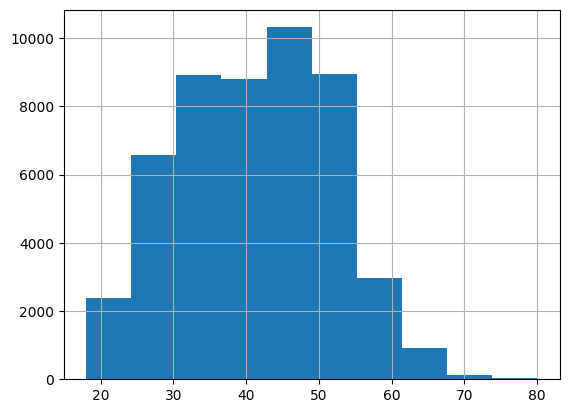

In [8]:
df_data['Age'].hist()

In [9]:
df_data = scorebin_helper.ScoreBin.bin_given(df_data, 'Age', bin_name='agebin', splits=[20, 30, 40, 50, 60])

In [10]:
df_data = scorebin_helper.ScoreBin.bin_megascore(df_data, 'score', bin_name='scorebin')

In [11]:
df_total = pd.pivot_table(df_data, index='scorebin', columns=['agebin'], values='Defaulter', aggfunc='count')
df_total.style.background_gradient(cmap ='Blues')

agebin,00.[-inf ~ 20),01.[20 ~ 30),02.[30 ~ 40),03.[40 ~ 50),04.[50 ~ 60),05.[60 ~ inf)
scorebin,,,,,,
01.[0 ~ 300),3.000000,11.000000,16.000000,4.000000,2.000000,1.000000
02.[300 ~ 500),76.000000,778.000000,638.000000,337.000000,108.000000,30.000000
03.[500 ~ 550),75.000000,1290.000000,1425.000000,944.000000,420.000000,58.000000
04.[550 ~ 600),48.000000,1569.000000,2672.000000,2524.000000,1192.000000,222.000000
05.[600 ~ 650),41.000000,1675.000000,3108.000000,3733.000000,2241.000000,350.000000
06.[650 ~ 700),40.000000,1420.000000,3010.000000,4092.000000,2748.000000,409.000000
07.[700 ~ 750),14.000000,800.000000,1955.000000,3245.000000,2241.000000,328.000000
08.[750 ~ 800),1.000000,147.000000,723.000000,1574.000000,1069.000000,135.000000
09.[800 ~ 850),nan,1.000000,18.000000,209.000000,209.000000,21.000000


In [12]:
df_pct = df_total / df_total.sum()
df_pct.style.format('{:.2%}').background_gradient(cmap ='Greens')

agebin,00.[-inf ~ 20),01.[20 ~ 30),02.[30 ~ 40),03.[40 ~ 50),04.[50 ~ 60),05.[60 ~ inf)
scorebin,,,,,,
01.[0 ~ 300),1.01%,0.14%,0.12%,0.02%,0.02%,0.06%
02.[300 ~ 500),25.50%,10.12%,4.70%,2.02%,1.06%,1.93%
03.[500 ~ 550),25.17%,16.77%,10.50%,5.67%,4.11%,3.73%
04.[550 ~ 600),16.11%,20.40%,19.70%,15.15%,11.65%,14.29%
05.[600 ~ 650),13.76%,21.78%,22.91%,22.40%,21.91%,22.52%
06.[650 ~ 700),13.42%,18.46%,22.19%,24.56%,26.86%,26.32%
07.[700 ~ 750),4.70%,10.40%,14.41%,19.48%,21.91%,21.11%
08.[750 ~ 800),0.34%,1.91%,5.33%,9.45%,10.45%,8.69%
09.[800 ~ 850),nan%,0.01%,0.13%,1.25%,2.04%,1.35%


In [13]:
df_bad = pd.pivot_table(df_data, index='scorebin', columns=['agebin'], values='Defaulter', aggfunc='sum')
df_bad.style.background_gradient(cmap ='Reds')

agebin,00.[-inf ~ 20),01.[20 ~ 30),02.[30 ~ 40),03.[40 ~ 50),04.[50 ~ 60),05.[60 ~ inf)
scorebin,,,,,,
01.[0 ~ 300),3.000000,11.000000,15.000000,4.000000,2.000000,1.000000
02.[300 ~ 500),49.000000,488.000000,388.000000,177.000000,63.000000,23.000000
03.[500 ~ 550),33.000000,501.000000,589.000000,374.000000,142.000000,27.000000
04.[550 ~ 600),13.000000,450.000000,717.000000,618.000000,278.000000,68.000000
05.[600 ~ 650),6.000000,256.000000,534.000000,627.000000,337.000000,60.000000
06.[650 ~ 700),2.000000,93.000000,239.000000,398.000000,221.000000,48.000000
07.[700 ~ 750),0.000000,17.000000,63.000000,140.000000,83.000000,9.000000
08.[750 ~ 800),0.000000,1.000000,7.000000,17.000000,22.000000,4.000000
09.[800 ~ 850),nan,0.000000,0.000000,1.000000,0.000000,0.000000


In [14]:
df_rate = df_bad / df_total
df_rate.style.format('{:.2%}')

agebin,00.[-inf ~ 20),01.[20 ~ 30),02.[30 ~ 40),03.[40 ~ 50),04.[50 ~ 60),05.[60 ~ inf)
scorebin,,,,,,
01.[0 ~ 300),100.00%,100.00%,93.75%,100.00%,100.00%,100.00%
02.[300 ~ 500),64.47%,62.72%,60.82%,52.52%,58.33%,76.67%
03.[500 ~ 550),44.00%,38.84%,41.33%,39.62%,33.81%,46.55%
04.[550 ~ 600),27.08%,28.68%,26.83%,24.48%,23.32%,30.63%
05.[600 ~ 650),14.63%,15.28%,17.18%,16.80%,15.04%,17.14%
06.[650 ~ 700),5.00%,6.55%,7.94%,9.73%,8.04%,11.74%
07.[700 ~ 750),0.00%,2.12%,3.22%,4.31%,3.70%,2.74%
08.[750 ~ 800),0.00%,0.68%,0.97%,1.08%,2.06%,2.96%
09.[800 ~ 850),nan%,0.00%,0.00%,0.48%,0.00%,0.00%


In [15]:
df_rate.style.background_gradient(cmap ='RdYlGn_r')

agebin,00.[-inf ~ 20),01.[20 ~ 30),02.[30 ~ 40),03.[40 ~ 50),04.[50 ~ 60),05.[60 ~ inf)
scorebin,,,,,,
01.[0 ~ 300),1.000000,1.000000,0.937500,1.000000,1.000000,1.000000
02.[300 ~ 500),0.644737,0.627249,0.608150,0.525223,0.583333,0.766667
03.[500 ~ 550),0.440000,0.388372,0.413333,0.396186,0.338095,0.465517
04.[550 ~ 600),0.270833,0.286807,0.268338,0.244849,0.233221,0.306306
05.[600 ~ 650),0.146341,0.152836,0.171815,0.167961,0.150379,0.171429
06.[650 ~ 700),0.050000,0.065493,0.079402,0.097263,0.080422,0.117359
07.[700 ~ 750),0.000000,0.021250,0.032225,0.043143,0.037037,0.027439
08.[750 ~ 800),0.000000,0.006803,0.009682,0.010801,0.020580,0.029630
09.[800 ~ 850),nan,0.000000,0.000000,0.004785,0.000000,0.000000


# 分数趋势分析

* 按给定分数区间划分

In [16]:
df_data = scorebin_helper.ScoreBin.bin_megascore(df_data, 'score', bin_name='scorebin')

In [17]:
df_total = pd.pivot_table(df_data, index='scorebin', columns=['month'], values='Defaulter', aggfunc='count')
df_total.style.background_gradient(cmap ='Blues')

month,2023-01,2023-02,2023-03,2023-04,2023-05
scorebin,,,,,
01.[0 ~ 300),7,7,7,9,7
02.[300 ~ 500),400,415,382,401,369
03.[500 ~ 550),810,838,833,870,861
04.[550 ~ 600),1691,1628,1628,1664,1616
05.[600 ~ 650),2295,2172,2198,2228,2255
06.[650 ~ 700),2290,2341,2373,2396,2319
07.[700 ~ 750),1658,1774,1624,1738,1789
08.[750 ~ 800),733,752,696,676,792
09.[800 ~ 850),98,78,110,90,82


In [18]:
df_pct = df_total / df_total.sum()
df_pct.style.format('{:.2%}').background_gradient(cmap ='Greens')

month,2023-01,2023-02,2023-03,2023-04,2023-05
scorebin,,,,,
01.[0 ~ 300),0.07%,0.07%,0.07%,0.09%,0.07%
02.[300 ~ 500),4.01%,4.15%,3.88%,3.98%,3.66%
03.[500 ~ 550),8.11%,8.38%,8.46%,8.64%,8.53%
04.[550 ~ 600),16.94%,16.27%,16.53%,16.52%,16.02%
05.[600 ~ 650),22.99%,21.71%,22.31%,22.12%,22.35%
06.[650 ~ 700),22.94%,23.40%,24.09%,23.79%,22.98%
07.[700 ~ 750),16.61%,17.73%,16.49%,17.26%,17.73%
08.[750 ~ 800),7.34%,7.52%,7.07%,6.71%,7.85%
09.[800 ~ 850),0.98%,0.78%,1.12%,0.89%,0.81%


In [19]:
df_bad = pd.pivot_table(df_data, index='scorebin', columns=['month'], values='Defaulter', aggfunc='sum')
df_bad.style.background_gradient(cmap ='Reds')

month,2023-01,2023-02,2023-03,2023-04,2023-05
scorebin,,,,,
01.[0 ~ 300),7,7,6,9,7
02.[300 ~ 500),231,250,238,238,231
03.[500 ~ 550),310,342,333,341,340
04.[550 ~ 600),423,442,442,408,429
05.[600 ~ 650),395,353,356,373,343
06.[650 ~ 700),184,222,228,178,189
07.[700 ~ 750),59,74,53,56,70
08.[750 ~ 800),7,11,15,8,10
09.[800 ~ 850),0,0,1,0,0


In [20]:
df_rate = df_bad / df_total
df_rate.style.format('{:.2%}').background_gradient(cmap ='RdYlGn_r')

month,2023-01,2023-02,2023-03,2023-04,2023-05
scorebin,,,,,
01.[0 ~ 300),100.00%,100.00%,85.71%,100.00%,100.00%
02.[300 ~ 500),57.75%,60.24%,62.30%,59.35%,62.60%
03.[500 ~ 550),38.27%,40.81%,39.98%,39.20%,39.49%
04.[550 ~ 600),25.01%,27.15%,27.15%,24.52%,26.55%
05.[600 ~ 650),17.21%,16.25%,16.20%,16.74%,15.21%
06.[650 ~ 700),8.03%,9.48%,9.61%,7.43%,8.15%
07.[700 ~ 750),3.56%,4.17%,3.26%,3.22%,3.91%
08.[750 ~ 800),0.95%,1.46%,2.16%,1.18%,1.26%
09.[800 ~ 850),0.00%,0.00%,0.91%,0.00%,0.00%


<Figure size 640x480 with 0 Axes>

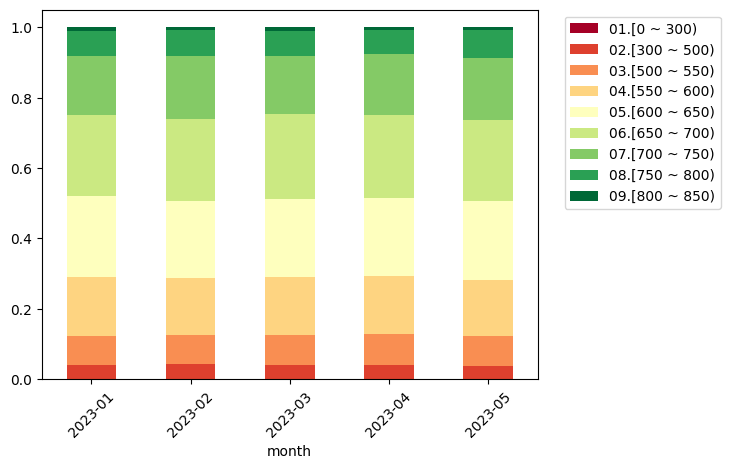

In [21]:
plt.figure()
df_pct.T.plot(kind='bar', stacked=True, cmap='RdYlGn')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.show()

<Figure size 640x480 with 0 Axes>

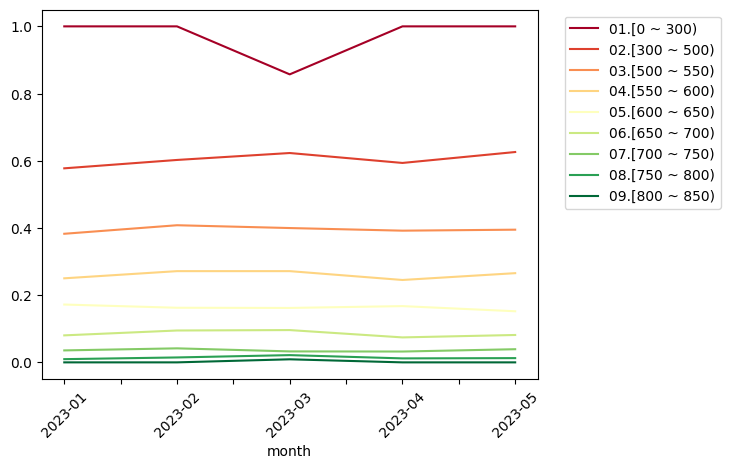

In [22]:
plt.figure()
df_rate.T.plot(kind='line', cmap='RdYlGn')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.show()

* 等频分数划分

In [23]:
df_data = scorebin_helper.ScoreBin.bin_quantile(df_data, 'score', 'Defaulter', bin_name='quantilebin')

In [24]:
df_total = pd.pivot_table(df_data, index='quantilebin', columns=['month'], values='Defaulter', aggfunc='count')
df_total

month,2023-01,2023-02,2023-03,2023-04,2023-05
quantilebin,,,,,
00.[-inf ~ 538.8596177312097),992,1021,983,1030,974
01.[538.8596177312097 ~ 575.979763128953),995,995,993,1022,995
02.[575.979763128953 ~ 602.9979980020305),1037,988,978,999,997
03.[602.9979980020305 ~ 626.0051729554237),1040,979,979,1037,964
04.[626.0051729554237 ~ 647.4961120276046),1020,956,1004,959,1062
05.[647.4961120276046 ~ 668.2879492821297),977,994,999,1056,975
06.[668.2879492821297 ~ 689.7562970371744),972,1013,1007,986,1022
07.[689.7562970371744 ~ 713.2723223771181),965,1008,992,1004,1031
08.[713.2723223771181 ~ 743.104848836398),990,1012,950,1026,1022


In [25]:
df_pct = df_total / df_total.sum()
df_pct.style.format('{:.2%}')

month,2023-01,2023-02,2023-03,2023-04,2023-05
quantilebin,,,,,
00.[-inf ~ 538.8596177312097),9.94%,10.20%,9.98%,10.23%,9.65%
01.[538.8596177312097 ~ 575.979763128953),9.97%,9.95%,10.08%,10.15%,9.86%
02.[575.979763128953 ~ 602.9979980020305),10.39%,9.88%,9.93%,9.92%,9.88%
03.[602.9979980020305 ~ 626.0051729554237),10.42%,9.79%,9.94%,10.30%,9.55%
04.[626.0051729554237 ~ 647.4961120276046),10.22%,9.56%,10.19%,9.52%,10.53%
05.[647.4961120276046 ~ 668.2879492821297),9.79%,9.94%,10.14%,10.48%,9.66%
06.[668.2879492821297 ~ 689.7562970371744),9.74%,10.12%,10.22%,9.79%,10.13%
07.[689.7562970371744 ~ 713.2723223771181),9.67%,10.07%,10.07%,9.97%,10.22%
08.[713.2723223771181 ~ 743.104848836398),9.92%,10.11%,9.64%,10.19%,10.13%


In [26]:
df_bad = pd.pivot_table(df_data, index='quantilebin', columns=['month'], values='Defaulter', aggfunc='sum')
df_bad.style.background_gradient(cmap ='Reds')

month,2023-01,2023-02,2023-03,2023-04,2023-05
quantilebin,,,,,
00.[-inf ~ 538.8596177312097),476,503,488,498,481
01.[538.8596177312097 ~ 575.979763128953),297,322,329,290,311
02.[575.979763128953 ~ 602.9979980020305),232,239,224,228,245
03.[602.9979980020305 ~ 626.0051729554237),188,184,186,192,162
04.[626.0051729554237 ~ 647.4961120276046),150,128,134,143,143
05.[647.4961120276046 ~ 668.2879492821297),122,108,123,117,102
06.[668.2879492821297 ~ 689.7562970371744),64,95,84,53,71
07.[689.7562970371744 ~ 713.2723223771181),43,62,52,50,51
08.[713.2723223771181 ~ 743.104848836398),33,42,30,27,39


In [27]:
df_rate = df_bad / df_total
df_rate.style.format('{:.2%}').background_gradient(cmap ='RdYlGn_r')

month,2023-01,2023-02,2023-03,2023-04,2023-05
quantilebin,,,,,
00.[-inf ~ 538.8596177312097),47.98%,49.27%,49.64%,48.35%,49.38%
01.[538.8596177312097 ~ 575.979763128953),29.85%,32.36%,33.13%,28.38%,31.26%
02.[575.979763128953 ~ 602.9979980020305),22.37%,24.19%,22.90%,22.82%,24.57%
03.[602.9979980020305 ~ 626.0051729554237),18.08%,18.79%,19.00%,18.51%,16.80%
04.[626.0051729554237 ~ 647.4961120276046),14.71%,13.39%,13.35%,14.91%,13.47%
05.[647.4961120276046 ~ 668.2879492821297),12.49%,10.87%,12.31%,11.08%,10.46%
06.[668.2879492821297 ~ 689.7562970371744),6.58%,9.38%,8.34%,5.38%,6.95%
07.[689.7562970371744 ~ 713.2723223771181),4.46%,6.15%,5.24%,4.98%,4.95%
08.[713.2723223771181 ~ 743.104848836398),3.33%,4.15%,3.16%,2.63%,3.82%


<Figure size 640x480 with 0 Axes>

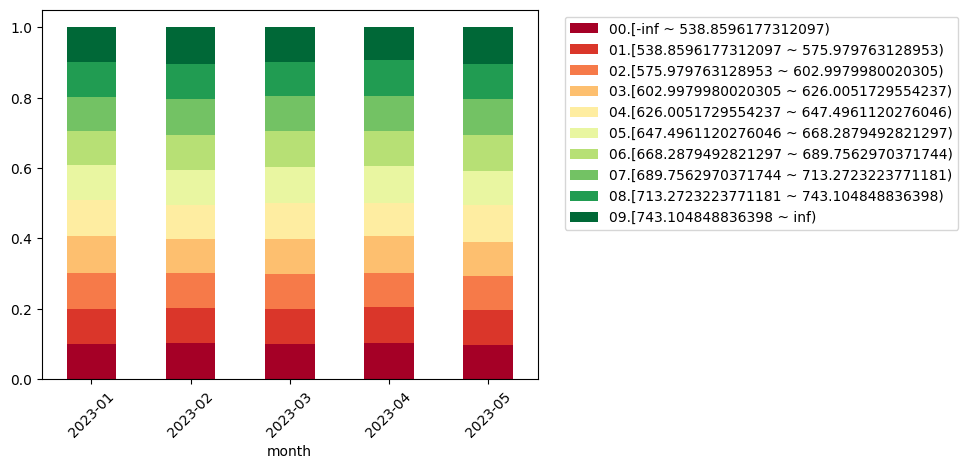

In [28]:
plt.figure()
df_pct.T.plot(kind='bar', stacked=True, cmap='RdYlGn')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.show()

<Figure size 640x480 with 0 Axes>

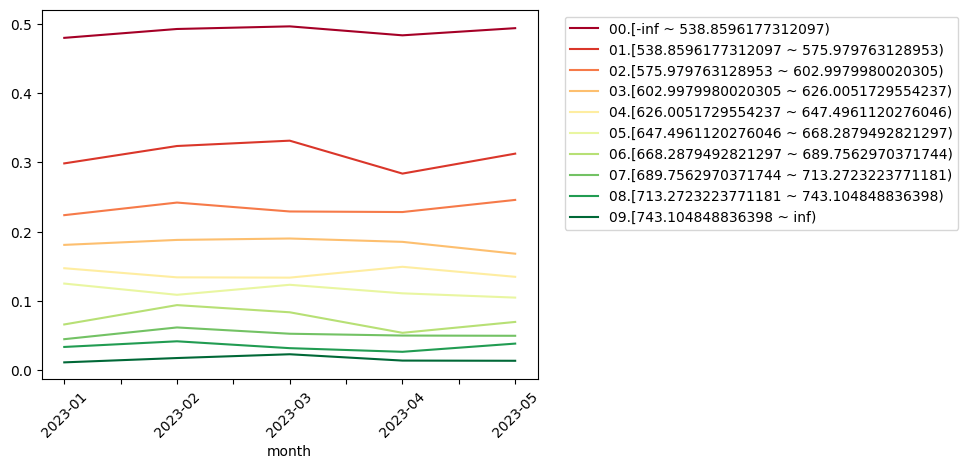

In [29]:
plt.figure()
df_rate.T.plot(kind='line', cmap='RdYlGn')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.show()

# 特征趋势分析

In [30]:
df_data = scorebin_helper.ScoreBin.bin_given(df_data, 'Age', bin_name='agebin', splits=[20, 30, 40, 50, 60])

In [31]:
df_total = pd.pivot_table(df_data, index='agebin', columns=['month'], values='Defaulter', aggfunc='count')
df_total.style.background_gradient(cmap ='Blues')

month,2023-01,2023-02,2023-03,2023-04,2023-05
agebin,,,,,
00.[-inf ~ 20),47,63,67,59,62
01.[20 ~ 30),1552,1489,1543,1546,1561
02.[30 ~ 40),2678,2668,2694,2707,2818
03.[40 ~ 50),3360,3404,3269,3310,3319
04.[50 ~ 60),2057,2057,1951,2133,2032
05.[60 ~ inf),288,324,327,317,298


In [32]:
df_pct = df_total / df_total.sum()
df_pct.style.format('{:.2%}').background_gradient(cmap ='Greens')

month,2023-01,2023-02,2023-03,2023-04,2023-05
agebin,,,,,
00.[-inf ~ 20),0.47%,0.63%,0.68%,0.59%,0.61%
01.[20 ~ 30),15.55%,14.88%,15.66%,15.35%,15.47%
02.[30 ~ 40),26.83%,26.67%,27.35%,26.88%,27.93%
03.[40 ~ 50),33.66%,34.02%,33.18%,32.86%,32.89%
04.[50 ~ 60),20.61%,20.56%,19.81%,21.18%,20.14%
05.[60 ~ inf),2.89%,3.24%,3.32%,3.15%,2.95%


In [33]:
df_bad = pd.pivot_table(df_data, index='agebin', columns=['month'], values='Defaulter', aggfunc='sum')
df_bad.style.background_gradient(cmap ='Reds')

month,2023-01,2023-02,2023-03,2023-04,2023-05
agebin,,,,,
00.[-inf ~ 20),16,23,26,18,23
01.[20 ~ 30),365,368,371,349,364
02.[30 ~ 40),483,513,542,520,494
03.[40 ~ 50),474,496,464,445,477
04.[50 ~ 60),229,246,218,237,218
05.[60 ~ inf),49,55,51,42,43


In [34]:
df_rate = df_bad / df_total
df_rate.style.format('{:.2%}').background_gradient(cmap ='RdYlGn_r')

month,2023-01,2023-02,2023-03,2023-04,2023-05
agebin,,,,,
00.[-inf ~ 20),34.04%,36.51%,38.81%,30.51%,37.10%
01.[20 ~ 30),23.52%,24.71%,24.04%,22.57%,23.32%
02.[30 ~ 40),18.04%,19.23%,20.12%,19.21%,17.53%
03.[40 ~ 50),14.11%,14.57%,14.19%,13.44%,14.37%
04.[50 ~ 60),11.13%,11.96%,11.17%,11.11%,10.73%
05.[60 ~ inf),17.01%,16.98%,15.60%,13.25%,14.43%
